heatmap

Функция sns.heatmap() используется для создания тепловых карт (heatmaps). 
Тепловые карты - это инструмент визуализации, позволяющий отображать данные в виде цветной матрицы, где каждая ячейка окрашена в зависимости от её значения. 
Этот вид диаграмм может быть полезен для визуализации корреляционных матриц и других двумерных наборов данных.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

seaborn.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)

sns.heatmap()

Основные параметры:
1) data: двумерный массив или DataFrame, который будет визуализироваться;
2) vmin и vmax: минимальные и максимальные значения для цветовой шкалы. По умолчанию vmin и vmax задаются автоматически на основе минимальных и максимальных значений данных;
3) cmap: цветовая карта для отображения значений;
4) center: параметр center задает центральное значение для цветовой шкалы;
5) square: когда square=True, каждая ячейка в тепловой карте будет квадратной (по умолчанию square=False);
6) robust: когда robust=True, цветовая шкала определяется на основе 2-го и 98-го процентилей данных, а не минимального и максимального значений (по умолчанию robust=False). Полезно использовать, когда в данных есть выбросы, которые могут искажать визуализацию, создавая слишком широкий диапазон значений для цветовой шкалы;
7) annot: если установлено в True, то на ячейках будут отображаться числовые значения;
8) annot_kws: используется для настройки аннотаций (текстовых меток), отображаемых внутри ячеек тепловой карты;
9) fmt: формат строк для аннотаций. Например, 'd' для целых чисел, '.2f' для чисел с двумя знаками после запятой;
10) linewidths: толщина линий, разделяющих ячейки;
11) linecolor: цвет линий, разделяющих ячейки;
12) cbar: если установлено в True, то будет отображаться цветовая шкала (color bar);
13) cbar_kws: словарь с параметрами для настройки цветовой шкалы;
14) xticklabels и yticklabels: метки для осей X и Y. Можно передать список меток, или использовать True для автоматической генерации меток на основе данных;
15) mask: булева матрица такого же размера, как и данные. Если элемент маски равен True, то соответствующая ячейка будет скрыта;
16) ax: позволяет указать оси (axes) matplotlib, на которых будет построен график.

Параметр annot_kws принимает словарь с ключами и значениями, которые соответствуют параметрам текстовых меток matplotlib. 

Вот несколько ключевых параметров, которые можно использовать:
1) fontsize: размер шрифта аннотаций;
2) fontstyle: стиль шрифта аннотаций (например, 'italic');
3) fontweight: толщина шрифта (например, 'bold');
4) 'fontfamily': вид шрифта (например, 'serif');
5) color: цвет текста аннотаций;
6) alpha: прозрачность текста аннотаций;
7) rotation: угол поворота текста аннотаций;
8) horizontalalignment: горизонтальное выравнивание текста;
9) verticalalignment: вертикальное выравнивание текста.

In [4]:
df = sns.load_dataset('mpg').dropna()

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [6]:
pivot = df.pivot_table(values='horsepower', index='cylinders', 
                     columns='origin', aggfunc='count', fill_value=0)
display(pivot)

origin,europe,japan,usa
cylinders,,,
3,0,4,0
4,61,69,69
5,3,0,0
6,4,6,73
8,0,0,103


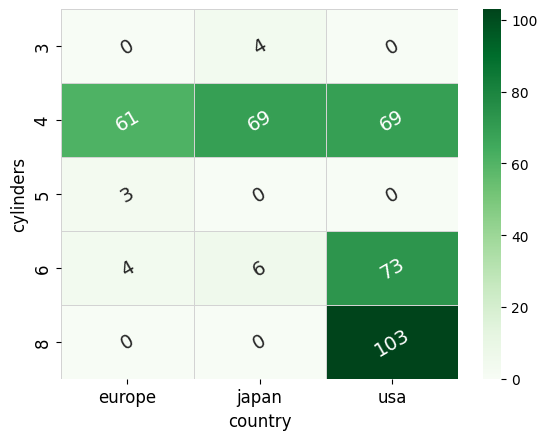

In [110]:
sns.heatmap(pivot,
            cmap='Greens',
            annot=True,
            fmt='d',
            linecolor='lightgrey',
            linewidths=0.5,
            annot_kws={'fontsize': 14, 'rotation': 30})

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel("country", fontsize=12)
plt.ylabel(pivot.index.name, fontsize=12)

plt.show()

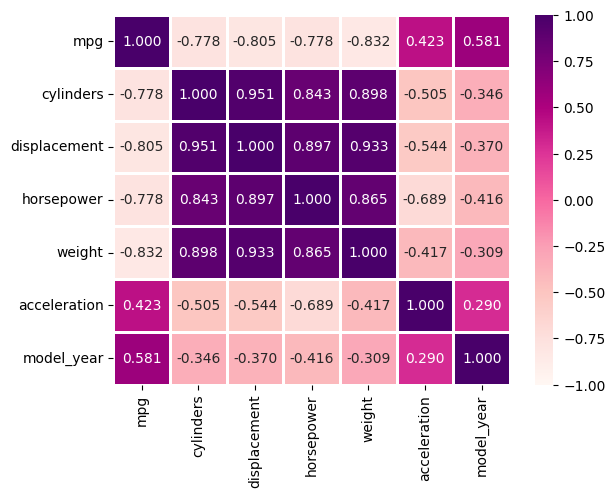

In [108]:
sns.heatmap(df.corr(numeric_only=True),
            cmap='RdPu',
            annot=True,
            vmin=-1,
            linewidths=1,
            linecolor='white',
            fmt='.3f')
plt.show()